# Diagrams

### Import libraries

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

import package_DBR
from package_DBR import *

### Set parameters

In [56]:
nameFile = 'Data/Open_loop_experiment_on_MV_2022-03-01-09h52.txt'

# FOPDT-optimised data
Kfopdt = 0.5606894892010703
Tfopdt = 166.19694987259177
THETAfopdt = 1.7144843527693636
# Graphical data extrapolation
Tg = 117.593
Tu = 7.4074
t1 = 47.06
t2 = 72.55

# SOPDT-optimised data
Ksopdt = 0.568729702885908
T1sopdt = 172.40926097266686
T2sopdt = 2.8511434253226774*(10**-5)
THETAsopdt = 1.9999999968968731

#  Strejc model
Kstrejc = 0.568729702885908
T1strejc = 117.593
T2strejc = 0
THETAstrejc = 7.4074

### Extract data from experiment data file

In [57]:
if 'MV' in nameFile:
    ExpVariable = 'MV'
else:    
    ExpVariable = 'DV'
    
print(ExpVariable)    
    
titleName = nameFile.split('.')[0]    
data = pd.read_csv(nameFile)
t = data['t'].values - data['t'].values[0]
MVexp = data['MV'].values
PVexp = data['PV'].values
DVexp = data['DV'].values

tstep = np.argwhere(np.diff(MVexp) != 0)
tstep = tstep[0][0]
tm = t[tstep:]
tm = tm - tm[0]    
MVstep = MVexp[tstep + 1] - MVexp[tstep]
MVm = MVexp[tstep:]
PVm = PVexp[tstep:]
PVm = (PVm - PVm[0])/MVstep
MVm = (MVm - MVm[0])/MVstep    

MV


### Calculate equation values and clean them

In [58]:
Ts = 1.0

PVFOPDT = FOPDT(MVm, Kfopdt, Tfopdt, THETAfopdt, Ts)
PVSOPDT = SOPDT(MVm, Ksopdt, T1sopdt, T2sopdt, THETAsopdt, Ts)
PVSTREJC = SOPDT(MVm, Kstrejc, T1strejc, T2strejc, THETAstrejc, Ts)

### Plot Response to step
Experimental & models

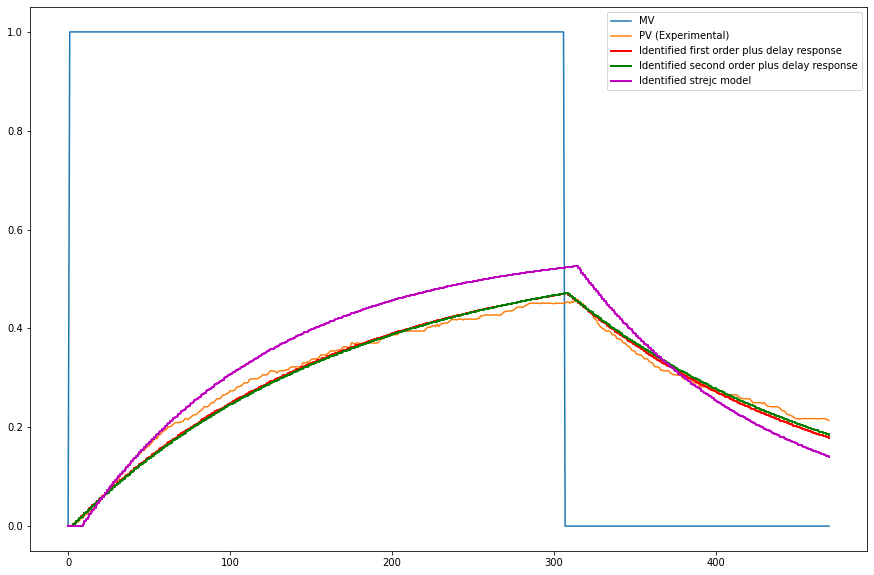

In [59]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)

plt.plot(tm, MVm, label='MV')
plt.plot(tm, PVm, label='PV (Experimental)')
plt.step(tm,PVFOPDT,'r-',linewidth=2,label='Identified first order plus delay response',where='post')
plt.step(tm,PVSOPDT,'g-',linewidth=2,label='Identified second order plus delay response',where='post')
plt.step(tm, PVSTREJC, 'm-',linewidth=2,label='Identified strejc model',where='post' )
#plt.plot(t, PVFOPDT, label='PVFOPDT')
# plt.plot(t, DV, label='ax3')

plt.legend(loc='upper right')



plt.show()


### Plot bode diagrams

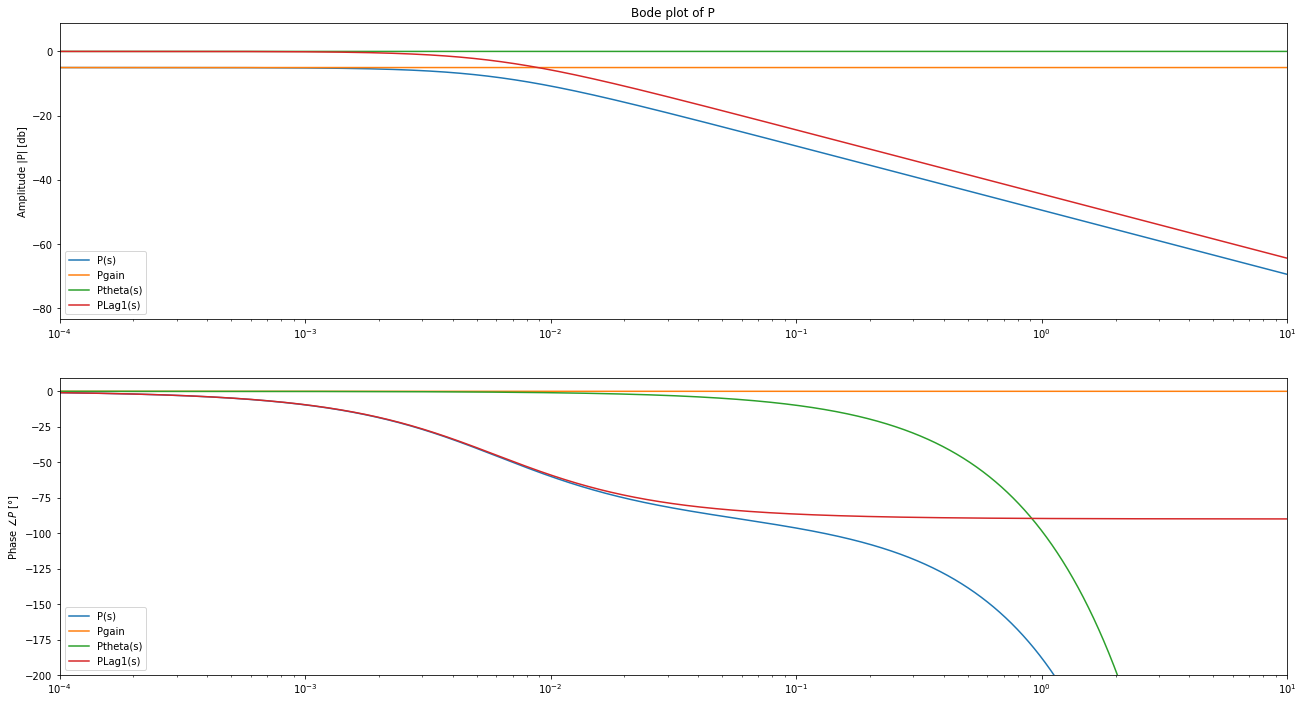

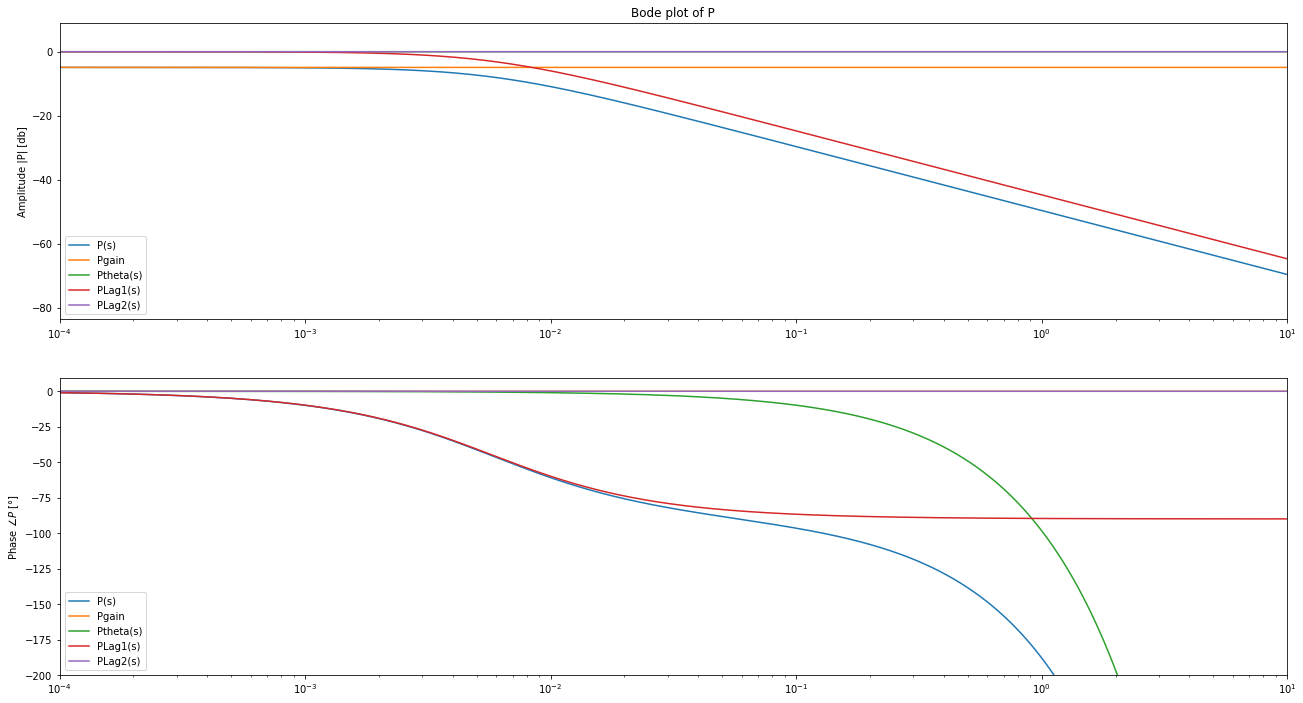

In [60]:
omega = np.logspace(-4, 1, 10000)

#FOPDT Model bode params
PFOPDT = Process({}) # Default process = unit gain

PFOPDT.parameters['Kp'] = Kfopdt
PFOPDT.parameters['Tlag1'] = Tfopdt
PFOPDT.parameters['Tlag2'] = 0
PFOPDT.parameters['theta'] = THETAfopdt

Bode(PFOPDT,omega)


#SOPDT Model bode params
PSOPDT = Process({}) # Default process = unit gain

PSOPDT.parameters['Kp'] = Ksopdt
PSOPDT.parameters['Tlag1'] = T1sopdt
PSOPDT.parameters['Tlag2'] = T2sopdt
PSOPDT.parameters['theta'] = THETAfopdt

Bode(PSOPDT,omega)
